<h1 align='center'> Claim Management System </h1>

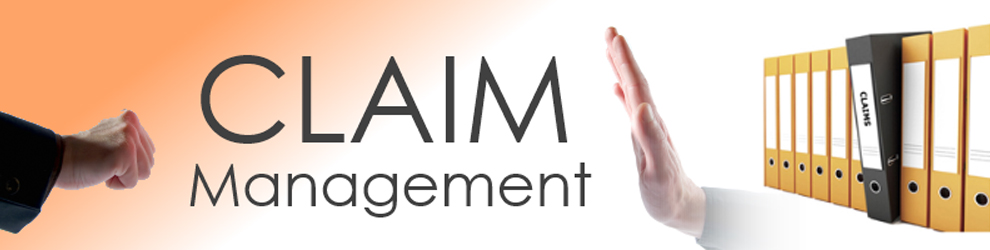

1. [Introduction](#1) <a id=18></a>
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Data Source Links](#3)
    - 1.3 [Task](#4)
2. [Preparation](#5)
    - 2.1 [Packages](#6)
    - 2.2 [Data](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#9)
    - 3.1 [Univariate Analysis](#10)
    - 3.2 [Bivariate Analysis](#11)
4. [Conclusions from EDA](#12)

## 1. Introduction <a id=1></a>

In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.

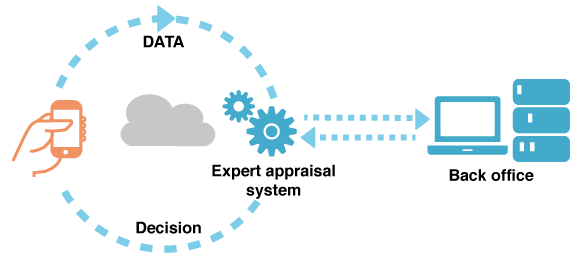

In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:
1. Suitable for approval.
2. Not suitable for approval.

We need to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

### 1.1 Data Dictionary <a id=2></a>

### 1.2 Data Source Links <a id=3></a>

https://www.kaggle.com/competitions/bnp-paribas-cardif-claims-management/data

### 1.3 Task <a id=4></a>

To predict the category of a claim based on features available early in the process. We'll follow the below data science project lifecycle:
1. Understanding of Data (EDA)
2. Pre-processing of data.
3. Selection of ML algorithm.
4. Hyper-parameter tuning.


## 2. Preparation <a id=5></a>

### 2.1 Packages <a id=6></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2.2 Data <a id=7></a>

In [2]:
df = pd.read_csv('../input/bnp-paribas-cardif-claims-management/train.csv.zip')

### 2.3 Understanding Data <a id=8></a>

#### 2.3.1 The shape of the data 

In [3]:
df.shape

(114321, 133)

#### 2.3.2 Preview of the first 5 rows of dataset 

In [4]:
df.head(10)

ID  target        v1        v2   v3        v4         v5        v6  \
0   3       1  1.335739  8.727474    C  3.921026   7.915266  2.599278   
1   4       1       NaN       NaN    C       NaN   9.191265       NaN   
2   5       1  0.943877  5.310079    C  4.410969   5.326159  3.979592   
3   6       1  0.797415  8.304757    C  4.225930  11.627438  2.097700   
4   8       1       NaN       NaN    C       NaN        NaN       NaN   
5   9       0       NaN       NaN    C       NaN   8.856791       NaN   
6  12       0  0.899806  7.312995    C  3.494148   9.946200  1.926070   
7  21       1       NaN       NaN    C       NaN        NaN       NaN   
8  22       0  2.078651  8.462619  NaN  3.739030   5.265636  1.573033   
9  23       1  1.144802  5.880606    C  3.244469   9.538384  2.500001   

         v7        v8  ...      v122      v123      v124  v125      v126  \
0  3.176895  0.012941  ...  8.000000  1.989780  0.035754    AU  1.804126   
1       NaN  2.301630  ...       NaN       NaN  0.598896    AF       NaN   
2  3.928571  0.019645  ...  9.333333  2.477596  0.013452    AE  1.773709   
3  1.987549  0.171947  ...  7.018256  1.812795  0.002267    CJ  1.415230   
4       NaN       NaN  ...       NaN       NaN       NaN     Z       NaN   
5       NaN  0.359993  ...       NaN       NaN  0.049861     X       NaN   
6  1.770427  0.066251  ...  3.476299  1.992594  0.083758    BJ  3.276100   
7       NaN       NaN  ...       NaN       NaN       NaN    BY       NaN   
8  2.303371  0.015869  ...  8.148148  1.875560  0.018659     S  1.159637   
9  1.559405  0.412610  ...  7.325843  4.896617  0.008944     E  1.344550   

       v127      v128  v129      v130      v131  
0  3.113719  2.024285     0  0.636365  2.857144  
1       NaN  1.957825     0       NaN       NaN  
2  3.922193  1.120468     2  0.883118  1.176472  
3  2.954381  1.990847     1  1.677108  1.034483  
4       NaN       NaN     0       NaN       NaN  
5       NaN  1.536222     0       NaN       NaN  
6  1.623298  2.266575     0  2.263736  0.970873  
7       NaN       NaN     0       NaN       NaN  
8  5.582865  1.105283     0  1.170731  3.333334  
9  1.601176  1.928009     0  3.174603  1.000000  

[10 rows x 133 columns]

#### 2.3.3 Checking the number of unique values  in each column 

In [5]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]
pd.set_option("display.max_columns", None)
pd.DataFrame(dict, index=['unique value count'])

ID  target     v1     v2  v3     v4     v5     v6  \
unique value count  114321       2  64487  64524   3  64524  65671  64487   

                       v7     v8     v9     v10    v11     v12    v13     v14  \
unique value count  64489  65688  64451  112485  64477  114233  64488  110472   

                      v15    v16    v17    v18    v19    v20     v21    v22  \
unique value count  64481  64414  64525  64489  64478  64469  113709  18210   

                      v23  v24    v25    v26    v27    v28    v29  v30  v31  \
unique value count  63638    5  65679  64489  64489  64482  64487    7    3   

                      v32    v33     v34    v35    v36    v37  v38    v39  \
unique value count  64488  64489  114209  64489  65609  64474   12  64484   

                       v40    v41    v42    v43    v44    v45    v46  v47  \
unique value count  114192  64488  64472  64484  64520  64486  65697   10   

                      v48    v49     v50    v51  v52    v53    v54    v55  \
unique value count  64519  64487  114224  63637   12  64469  65694  64488   

                    v56    v57    v58    v59    v60    v61  v62    v63    v64  \
unique value count  122  64488  64482  64524  64488  64519    8  65681  64524   

                      v65  v66    v67    v68    v69    v70  v71  v72    v73  \
unique value count  64472    3  64487  64474  64332  65631    9   13  64484   

                    v74  v75    v76    v77    v78  v79    v80    v81    v82  \
unique value count    3    4  64525  64489  64265   18  64466  65685  65663   

                      v83    v84    v85    v86    v87    v88    v89    v90  \
unique value count  64489  64487  63637  64489  65630  64489  65686  64484   

                    v91    v92    v93    v94    v95    v96    v97    v98  \
unique value count    7  64478  64489  64489  64478  64489  64470  65656   

                      v99   v100   v101   v102   v103   v104   v105   v106  \
unique value count  64488  64471  64525  62986  64489  64489  65658  64521   

                    v107   v108   v109  v110   v111  v112  v113    v114  \
unique value count     7  65687  65673     3  64486    22    36  114267   

                     v115   v116   v117   v118   v119   v120   v121   v122  \
unique value count  64253  64485  65662  64470  63638  64484  64480  64461   

                     v123   v124  v125   v126   v127   v128  v129   v130  \
unique value count  63641  65691    90  64487  64488  65687    10  64476   

                     v131  
unique value count  64414

#### 2.3.4 Checking data type of each column

In [6]:
df.dtypes.reset_index().transpose()

0       1        2        3       4        5        6        7    \
index     ID  target       v1       v2      v3       v4       v5       v6   
0      int64   int64  float64  float64  object  float64  float64  float64   

           8        9        10       11       12       13       14       15   \
index       v7       v8       v9      v10      v11      v12      v13      v14   
0      float64  float64  float64  float64  float64  float64  float64  float64   

           16       17       18       19       20       21       22      23   \
index      v15      v16      v17      v18      v19      v20      v21     v22   
0      float64  float64  float64  float64  float64  float64  float64  object   

           24      25       26       27       28       29       30      31   \
index      v23     v24      v25      v26      v27      v28      v29     v30   
0      float64  object  float64  float64  float64  float64  float64  object   

          32       33       34       35       36       37       38     39   \
index     v31      v32      v33      v34      v35      v36      v37    v38   
0      object  float64  float64  float64  float64  float64  float64  int64   

           40       41       42       43       44       45       46       47   \
index      v39      v40      v41      v42      v43      v44      v45      v46   
0      float64  float64  float64  float64  float64  float64  float64  float64   

          48       49       50       51       52      53       54       55   \
index     v47      v48      v49      v50      v51     v52      v53      v54   
0      object  float64  float64  float64  float64  object  float64  float64   

           56      57       58       59       60       61       62     63   \
index      v55     v56      v57      v58      v59      v60      v61    v62   
0      float64  object  float64  float64  float64  float64  float64  int64   

           64       65       66      67       68       69       70       71   \
index      v63      v64      v65     v66      v67      v68      v69      v70   
0      float64  float64  float64  object  float64  float64  float64  float64   

          72     73       74      75      76       77       78       79   \
index     v71    v72      v73     v74     v75      v76      v77      v78   
0      object  int64  float64  object  object  float64  float64  float64   

          80       81       82       83       84       85       86       87   \
index     v79      v80      v81      v82      v83      v84      v85      v86   
0      object  float64  float64  float64  float64  float64  float64  float64   

           88       89       90       91      92       93       94       95   \
index      v87      v88      v89      v90     v91      v92      v93      v94   
0      float64  float64  float64  float64  object  float64  float64  float64   

           96       97       98       99       100      101      102      103  \
index      v95      v96      v97      v98      v99     v100     v101     v102   
0      float64  float64  float64  float64  float64  float64  float64  float64   

           104      105      106      107     108      109      110     111  \
index     v103     v104     v105     v106    v107     v108     v109    v110   
0      float64  float64  float64  float64  object  float64  float64  object   

           112     113     114      115      116      117      118      119  \
index     v111    v112    v113     v114     v115     v116     v117     v118   
0      float64  object  object  float64  float64  float64  float64  float64   

           120      121      122      123      124      125     126      127  \
index     v119     v120     v121     v122     v123     v124    v125     v126   
0      float64  float64  float64  float64  float64  float64  object  float64   

           128      129    130      131      132  
index     v127     v128   v129     v130     v131  
0      float64  float64  int64  float64  float64

#### 2.3.5 Separating Categorical and Continuous variables

In [7]:
target_col = ['target']
cat_cols = ['v3', 'v22', 'v24', 'v30', 'v31', 'v38', 'v47', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125', 'v129'] 
con_cols = list(df.columns.drop(target_col + cat_cols))

print("There are {} Categorical cols : {}".format(len(cat_cols), cat_cols))
print("There are {} Continuous cols : {}".format(len(con_cols), con_cols))
print("There are {} Target cols : {}".format(len(target_col), target_col))

There are 23 Categorical cols : ['v3', 'v22', 'v24', 'v30', 'v31', 'v38', 'v47', 'v52', 'v56', 'v62', 'v66', 'v71', 'v72', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125', 'v129']
There are 109 Continuous cols : ['ID', 'v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v23', 'v25', 'v26', 'v27', 'v28', 'v29', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v48', 'v49', 'v50', 'v51', 'v53', 'v54', 'v55', 'v57', 'v58', 'v59', 'v60', 'v61', 'v63', 'v64', 'v65', 'v67', 'v68', 'v69', 'v70', 'v73', 'v76', 'v77', 'v78', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v108', 'v109', 'v111', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v13

#### 2.3.6 Checking the number of unique values for cat columns

In [8]:
dict = {}
for col in cat_cols:
    dict[col] = df[col].value_counts().shape[0]
pd.set_option("display.max_columns", None)
pd.DataFrame(dict, index=['unique value count'])

v3    v22  v24  v30  v31  v38  v47  v52  v56  v62  v66  \
unique value count   3  18210    5    7    3   12   10   12  122    8    3   

                    v71  v72  v74  v75  v79  v91  v107  v110  v112  v113  \
unique value count    9   13    3    4   18    7     7     3    22    36   

                    v125  v129  
unique value count    90    10

Category columns v22 and v56 has a lot of categorical values. We might need to address these variables in data preprocessing.
1. We can use bayesian target encoder.
2. We can use frequency based ordinal encoder to give importance to each value relatice to its frequeny.

#### 2.3.7 Summary statistics for cols

In [9]:
df.describe()

ID         target            v1            v2            v4  \
count  114321.000000  114321.000000  6.448900e+04  6.452500e+04  6.452500e+04   
mean   114228.928228       0.761199  1.630686e+00  7.464411e+00  4.145098e+00   
std     65934.487362       0.426353  1.082813e+00  2.961676e+00  1.148263e+00   
min         3.000000       0.000000 -9.996497e-07 -9.817614e-07 -6.475929e-07   
25%     57280.000000       1.000000  9.135798e-01  5.316428e+00  3.487398e+00   
50%    114189.000000       1.000000  1.469550e+00  7.023803e+00  4.205991e+00   
75%    171206.000000       1.000000  2.136128e+00  9.465497e+00  4.833250e+00   
max    228713.000000       1.000000  2.000000e+01  2.000000e+01  2.000000e+01   

                 v5            v6            v7            v8            v9  \
count  6.569700e+04  6.448900e+04  6.448900e+04  6.570200e+04  6.447000e+04   
mean   8.742359e+00  2.436402e+00  2.483921e+00  1.496569e+00  9.031859e+00   
std    2.036018e+00  5.999653e-01  5.894485e-01  2.783003e+00  1.930262e+00   
min   -5.287068e-07 -9.055091e-07 -9.468765e-07 -7.783778e-07 -9.828757e-07   
25%    7.605918e+00  2.065064e+00  2.101477e+00  8.658986e-02  7.853659e+00   
50%    8.670867e+00  2.412790e+00  2.452166e+00  3.860317e-01  9.059582e+00   
75%    9.771353e+00  2.775285e+00  2.834285e+00  1.625246e+00  1.023256e+01   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                v10           v11           v12           v13           v14  \
count  1.142370e+05  6.448500e+04  1.142350e+05  6.448900e+04  1.143170e+05   
mean   1.883046e+00  1.544741e+01  6.881304e+00  3.798396e+00  1.209428e+01   
std    1.393979e+00  7.900790e-01  9.244945e-01  1.175892e+00  1.443947e+00   
min   -9.875317e-07 -1.459062e-07  5.143224e-07 -8.464889e-07 -9.738831e-07   
25%    1.050328e+00  1.500000e+01  6.322471e+00  3.067998e+00  1.125602e+01   
50%    1.312910e+00  1.549595e+01  6.612969e+00  3.591081e+00  1.196783e+01   
75%    2.100657e+00  1.595000e+01  7.019983e+00  4.289486e+00  1.271577e+01   
max    1.853392e+01  2.000000e+01  1.871055e+01  2.000000e+01  2.000000e+01   

                v15           v16           v17           v18           v19  \
count  6.448500e+04  6.442600e+04  6.452500e+04  6.448900e+04  6.447800e+04   
mean   2.080911e+00  4.923222e+00  3.832270e+00  8.410455e-01  2.223005e-01   
std    7.329166e-01  1.791187e+00  1.911504e+00  6.162762e-01  1.713459e-01   
min   -8.830427e-07 -9.978294e-07 -9.066455e-07  4.475470e-07 -5.178987e-07   
25%    1.611419e+00  3.864735e+00  2.699122e+00  5.095767e-01  1.739154e-01   
50%    1.992031e+00  4.932127e+00  3.554267e+00  7.739063e-01  1.986554e-01   
75%    2.418676e+00  5.957448e+00  4.512221e+00  1.071453e+00  2.386316e-01   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                v20            v21           v23           v25           v26  \
count  64481.000000  113710.000000  6.364600e+04  65702.000000  6.448900e+04   
mean      17.773592       7.029740  1.093088e+00      1.698129  1.876031e+00   
std        1.155002       1.072271  4.003695e+00      2.956854  5.511957e-01   
min        1.516776       0.106181 -9.999932e-07      0.041043 -9.346696e-07   
25%       17.330703       6.415535 -4.093461e-07      0.149666  1.510201e+00   
50%       18.036585       7.045416  1.845672e-07      0.472307  1.826277e+00   
75%       18.542631       7.670577  7.809954e-07      1.947268  2.181855e+00   
max       20.000001      19.296052  2.000000e+01     20.000001  2.000000e+01   

                v27           v28           v29           v32           v33  \
count  6.448900e+04  6.448900e+04  6.448900e+04  6.448900e+04  6.448900e+04   
mean   2.743454e+00  5.093328e+00  8.206416e+00  1.622151e+00  2.161633e+00   
std    8.343556e-01  2.677940e+00  1.285432e+00  5.635237e-01  9.848598e-01   
min   -9.915986e-07 -6.960880e-07 -3.040753e-07 -9.559960e-07 -9.713108e-07   
25%    2.196970e+00  3.491553e+00  7

#### 2.3.8 Missing Values
##### Missing values (column wise)

There are multiple columns with a high degree of missing values.

In [10]:
pd.DataFrame(df.isnull().sum()).transpose()

ID  target     v1     v2    v3     v4     v5     v6     v7     v8     v9  \
0   0       0  49832  49796  3457  49796  48624  49832  49832  48619  49851   

   v10    v11  v12    v13  v14    v15    v16    v17    v18    v19    v20  v21  \
0   84  49836   86  49832    4  49836  49895  49796  49832  49843  49840  611   

   v22    v23  v24    v25    v26    v27    v28    v29    v30   v31    v32  \
0  500  50675    0  48619  49832  49832  49832  49832  60110  3457  49832   

     v33  v34    v35    v36    v37  v38    v39  v40    v41    v42    v43  \
0  49832  111  49832  48624  49843    0  49836  111  49832  49832  49836   

     v44    v45    v46  v47    v48    v49  v50    v51  v52    v53    v54  \
0  49796  49832  48619    0  49796  49832   86  50678    3  49836  48619   

     v55   v56    v57    v58    v59    v60    v61  v62    v63    v64    v65  \
0  49832  6882  49832  49836  49796  49832  49796    0  48619  49796  49840   

   v66    v67    v68    v69    v70  v71  v72    v73  v74  v75    v76    v77  \
0    0  49832  49836  49895  48636    0    0  49836    0    0  49796  49832   

     v78  v79    v80    v81    v82    v83    v84    v85    v86    v87    v88  \
0  49895    0  49851  48624  48624  49832  49832  50682  49832  48663  49832   

     v89    v90  v91    v92    v93    v94    v95    v96    v97    v98    v99  \
0  48619  49836    3  49843  49832  49832  49843  49832  49843  48654  49832   

    v100   v101   v102   v103   v104   v105   v106  v107   v108   v109  v110  \
0  49836  49796  51316  49832  49832  48658  49796     3  48624  48624     0   

    v111  v112   v113  v114   v115   v116   v117   v118   v119   v120   v121  \
0  49832   382  55304    30  49895  49836  48624  49843  50680  49836  49840   

    v122   v123   v124  v125   v126   v127   v128  v129   v130   v131  
0  49851  50678  48619    77  49832  49832  48624     0  49843  49895

##### Missing values in terms of percentage of total data

**33%** of the data is has missing values.

In [11]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.33525642378968123

## 3. Exploratory Data Analysis <a id=9></a>

### 3.1 Univariate Analysis <a id=10></a>

#### 3.1.1 Count plot for target variable

In [12]:
def set_spines_visibility(ax, is_visible):
    for s in ['left', 'right', 'top', 'bottom']:
        ax.spines[s].set_visible(is_visible)

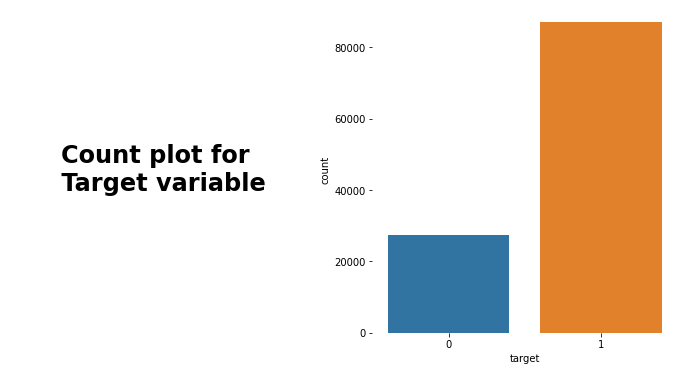

In [13]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="Count plot for \n Target variable",
        verticalalignment='center', horizontalalignment='center',
        fontsize='24', fontweight='bold')
set_spines_visibility(ax0, False)
ax0.tick_params(bottom=False, left=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax1 = fig.add_subplot(gs[0,1])
sns.countplot(ax=ax1, data=df, x=target_col[0])
set_spines_visibility(ax1, False)

#### 3.1.1 Count plot for categorical variables

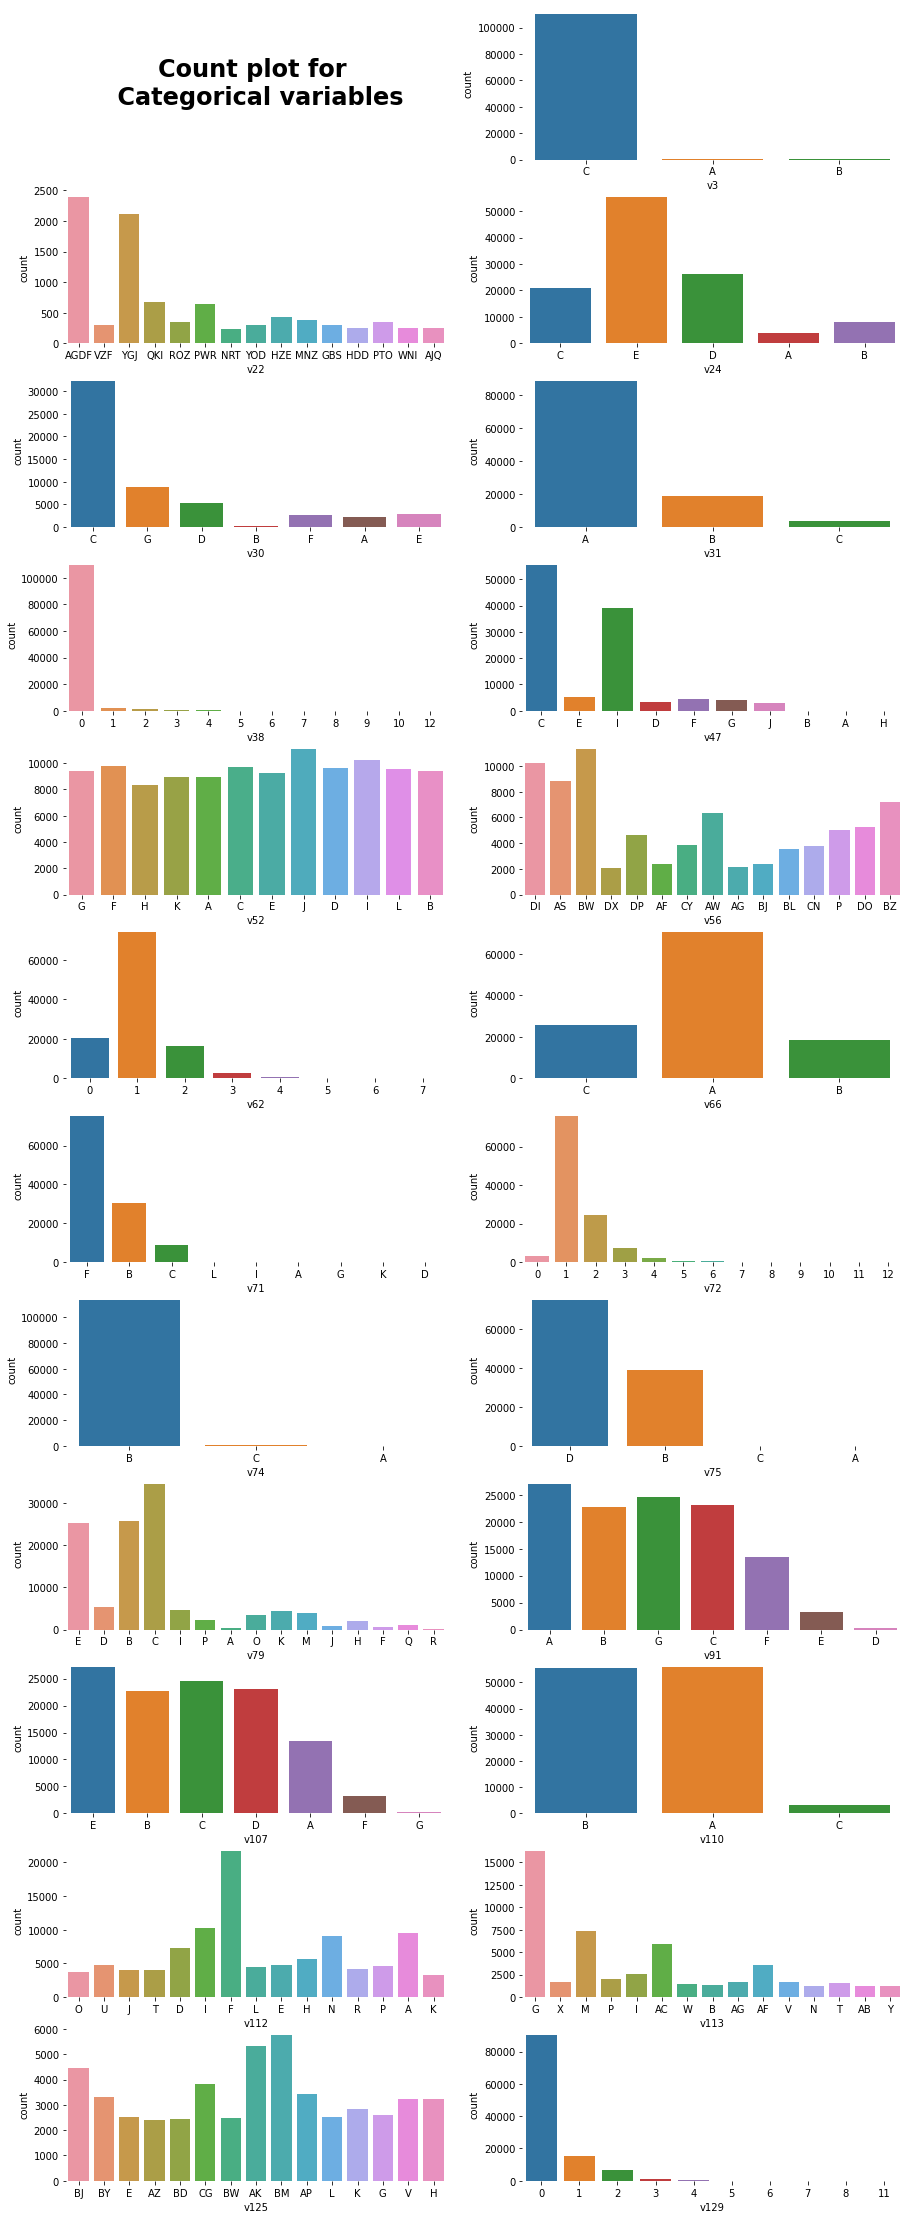

In [14]:
fig = plt.figure(figsize=(15,40))
gs = fig.add_gridspec(12, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="Count plot for \n Categorical variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='24', fontweight='bold')
set_spines_visibility(ax0, False)
ax0.tick_params(bottom=False, left=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

for i in range(len(cat_cols)):
    ax = fig.add_subplot(gs[(i+1)//2, 1-i%2])
    if df[cat_cols[i]].unique().shape[0] > 15:
        df_top_feature_values = df[cat_cols[i]].value_counts().reset_index()
        df_top_feature_values.columns = ['col_values', 'value_count']
        top_values = df_top_feature_values['col_values'].head(15)
        sns.countplot(ax=ax, data=df[df[cat_cols[i]].isin(top_values)], x=cat_cols[i])
    else:
        sns.countplot(ax=ax, data=df, x=cat_cols[i])
    set_spines_visibility(ax, False)

# plt.xticks(rotation=0)
plt.show()

There are lot of imbalance in data within single feature column. Some feature columns are almost dominated by single value itself. We can drop these columns in next step after getting actual numbers, as it wouldn't provide any information to the model.

#### 3.1.2 Identification of Single Value dominated Feature columns

Based on above univariate count plots, features <b> v3, v30, v31, v38, v62, v74 & v129 </b> seemed single valued feature, let's further analysing these features.

In [15]:
percent_v3 = df[df['v3'] == 'C'].shape[0]/df.shape[0]
print('Feature value V3 has value = "C" for {}% out of total samples'.format(percent_v3*100))

percent_v30 = df[df['v30'] == 'C'].shape[0]/df.shape[0]
print('Feature value V30 has value = "C" for {}% out of total samples'.format(percent_v30*100))

percent_v31 = df[df['v31'] == 'A'].shape[0]/df.shape[0]
print('Feature value V31 has value = "A" for {}% out of total samples'.format(percent_v31*100))

percent = df[df['v38'] == 0].shape[0]/df.shape[0]
print('Feature value V38 has value = "0" for {}% out of total samples'.format(percent*100))

percent = df[df['v62'] == 1].shape[0]/df.shape[0]
print('Feature value V62 has value = "1" for {}% out of total samples'.format(percent*100))

percent = df[df['v74'] == 'B'].shape[0]/df.shape[0]
print('Feature value V74 has value = "B" for {}% out of total samples'.format(percent*100))

percent = df[df['v129'] == 0].shape[0]/df.shape[0]
print('Feature value V129 has value = "0" for {}% out of total samples'.format(percent*100))

Feature value V3 has value = "C" for 96.73113426229651% out of total samples
Feature value V30 has value = "C" for 28.147059595349937% out of total samples
Feature value V31 has value = "A" for 77.27976487259559% out of total samples
Feature value V38 has value = "0" for 95.97886652496041% out of total samples
Feature value V62 has value = "1" for 64.58131052037683% out of total samples
Feature value V74 has value = "B" for 99.33433052545027% out of total samples
Feature value V129 has value = "0" for 78.94175173415208% out of total samples


Feature Columns <b>[v3, v38, v74] </b> is not adding useful information for model building. These columns have same value in more than <b>95%</b> of the samples.

#### 3.1.3 Boxen plot for continuous feature variables

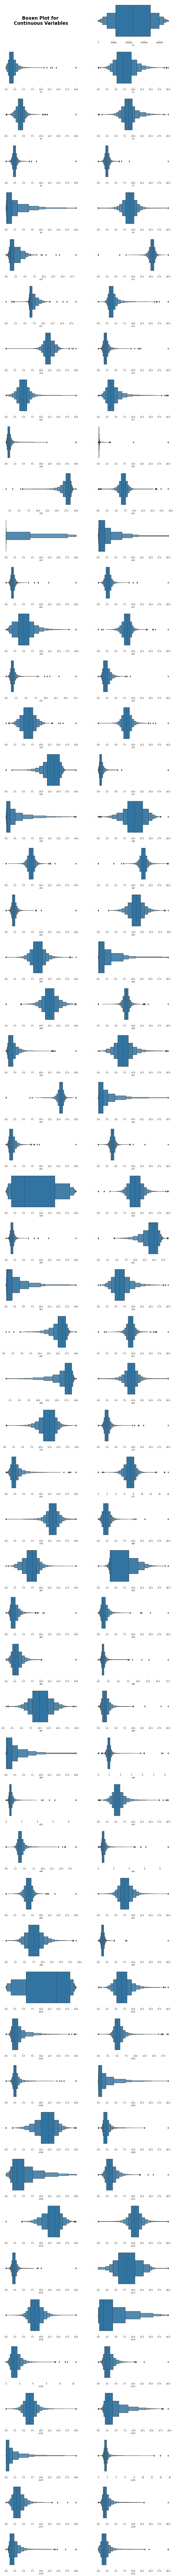

In [16]:
fig = plt.figure(figsize=(16, 250))
gs = fig.add_gridspec(55, 2)

for i in range(len(con_cols) + 1):
    if i == 0:
        ax = fig.add_subplot(gs[0,0])
        ax.text(x=0.5, y=0.5, s="Boxen Plot for \nContinuous Variables",
               horizontalalignment='center', verticalalignment='center',
               fontweight='bold', fontsize='24')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
        set_spines_visibility(ax, False)
    else:
        ax = fig.add_subplot(gs[(i)//2, i%2])
        sns.boxenplot(ax=ax, data=df, x=con_cols[i-1])
        set_spines_visibility(ax, False)
plt.show()

<b>Outliers</b> are present in a `majority of continuous feature variables` that we need to address during data pre-processing.

#### 3.1.4 Principal component analysis on continuous features

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(pd.notnull(df[con_cols])))
scaled_df.head()

pca = PCA(.99)
pca_df = pca.fit_transform(scaled_df)
print("original data shape {}", scaled_df.shape)
print("pca data shape", pca_df.shape)
pca.explained_variance_ratio_

original data shape {} (114321, 109)
pca data shape (114321, 5)


array([0.90965668, 0.04574843, 0.01466652, 0.01130679, 0.00874637])

PCA shows that we can keep <b>99% data variance</b> with 5 columns only. Hence, we can reduce the dimensionality of continuous features from <b>109 --> 5</b>.

## 3.2 Bivariate Analysis <a id=11></a>
### 3.2.1 Correlation Matrix for continuous features
Given data has a large number of continuous features. To better visualise the heatmap, we have divided the heatmap into 4 views (top-left, top-right, bottom-left & bottom-right).

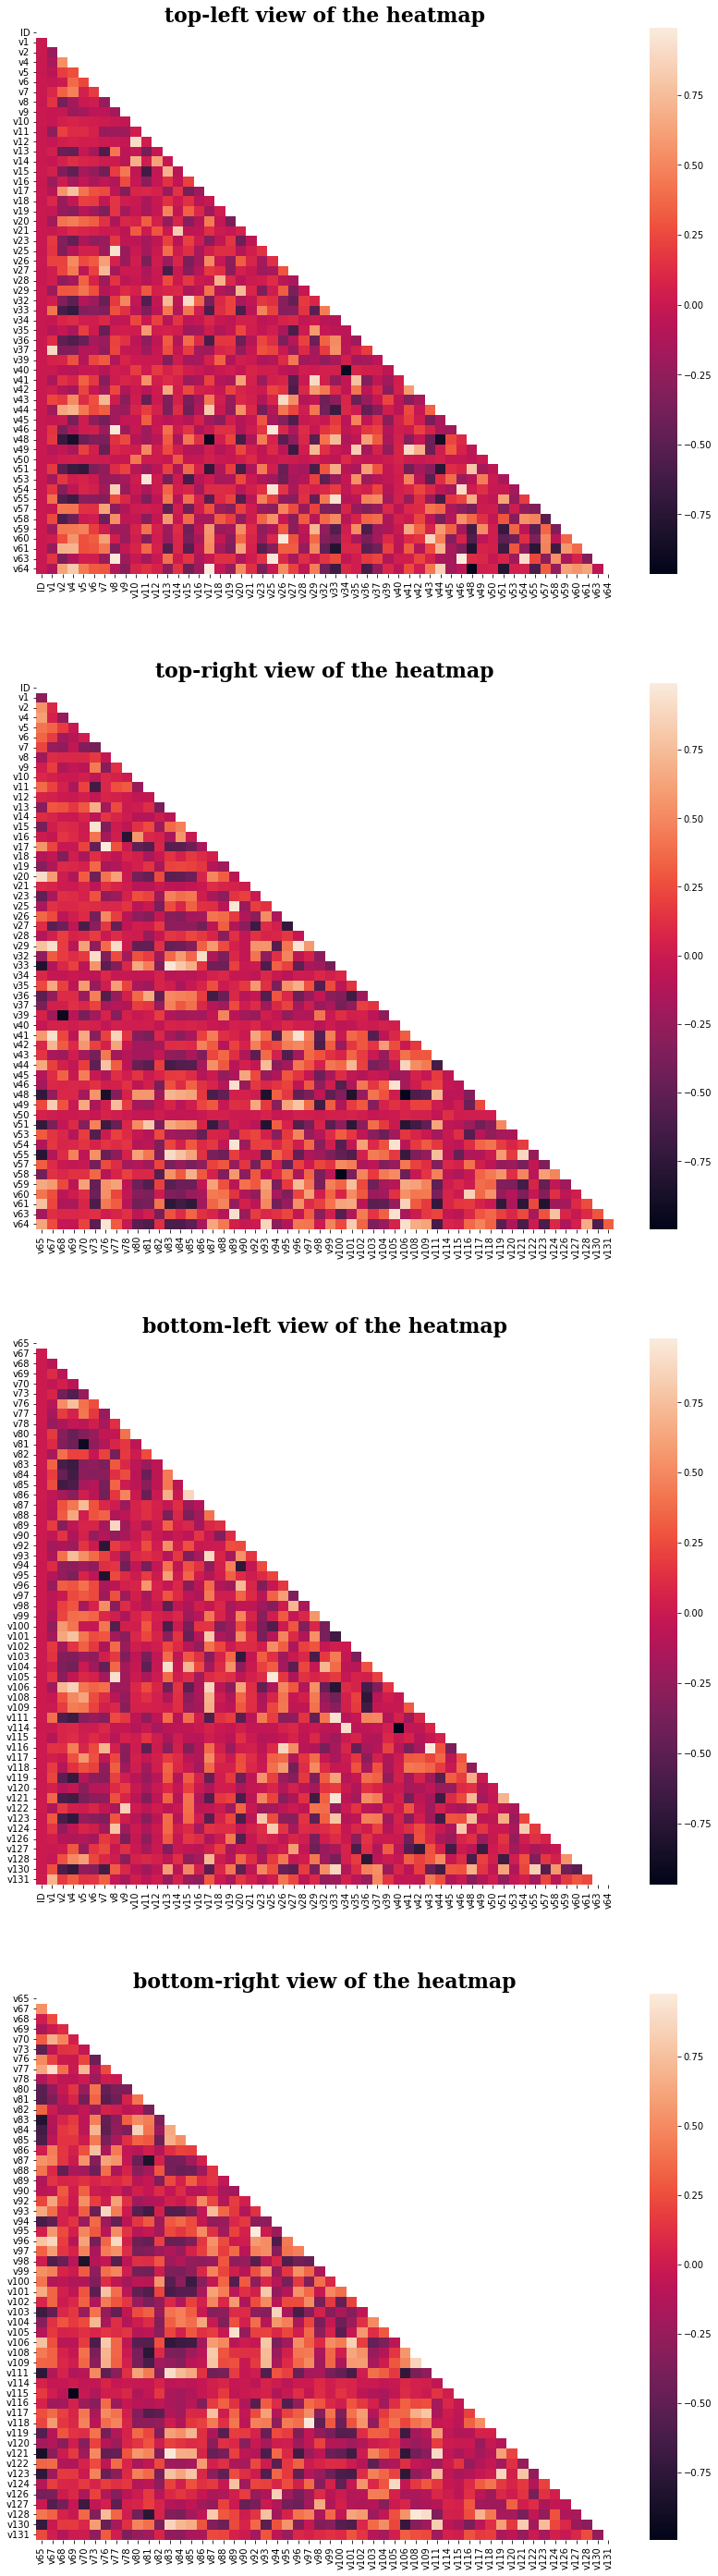

In [18]:
df_corr = df[con_cols].corr().transpose()

fig = plt.figure(figsize=(14, 50))
gs = fig.add_gridspec(4,1)

ax = fig.add_subplot(gs[0,0])
mask = np.triu(np.ones_like(df_corr.iloc[:55, :55], dtype=bool))
sns.heatmap(ax=ax, data=df_corr.iloc[:55, :55], mask=mask)
_ = ax.set_title('top-left view of the heatmap',fontsize=22, fontweight='bold', fontfamily='serif')

ax = fig.add_subplot(gs[1,0])
mask = np.triu(np.ones_like(df_corr.iloc[:55, 55:], dtype=bool))
sns.heatmap(ax=ax, data=df_corr.iloc[:55, 55:], mask=mask)
_ = ax.set_title('top-right view of the heatmap',fontsize=22, fontweight='bold', fontfamily='serif')

ax = fig.add_subplot(gs[2,0])
mask = np.triu(np.ones_like(df_corr.iloc[55:, :55], dtype=bool))
sns.heatmap(ax=ax, data=df_corr.iloc[55:, :55], mask=mask)
_ = ax.set_title('bottom-left view of the heatmap',fontsize=22, fontweight='bold', fontfamily='serif')

ax = fig.add_subplot(gs[3,0])
mask = np.triu(np.ones_like(df_corr.iloc[55:, 55:], dtype=bool))
sns.heatmap(ax=ax, data=df_corr.iloc[55:, 55:], mask=mask)
_ = ax.set_title('bottom-right view of the heatmap',fontsize=22, fontweight='bold', fontfamily='serif')

### 3.2.2 Scatterplot heatmap of dataframe

<Figure size 7200x7200 with 0 Axes>

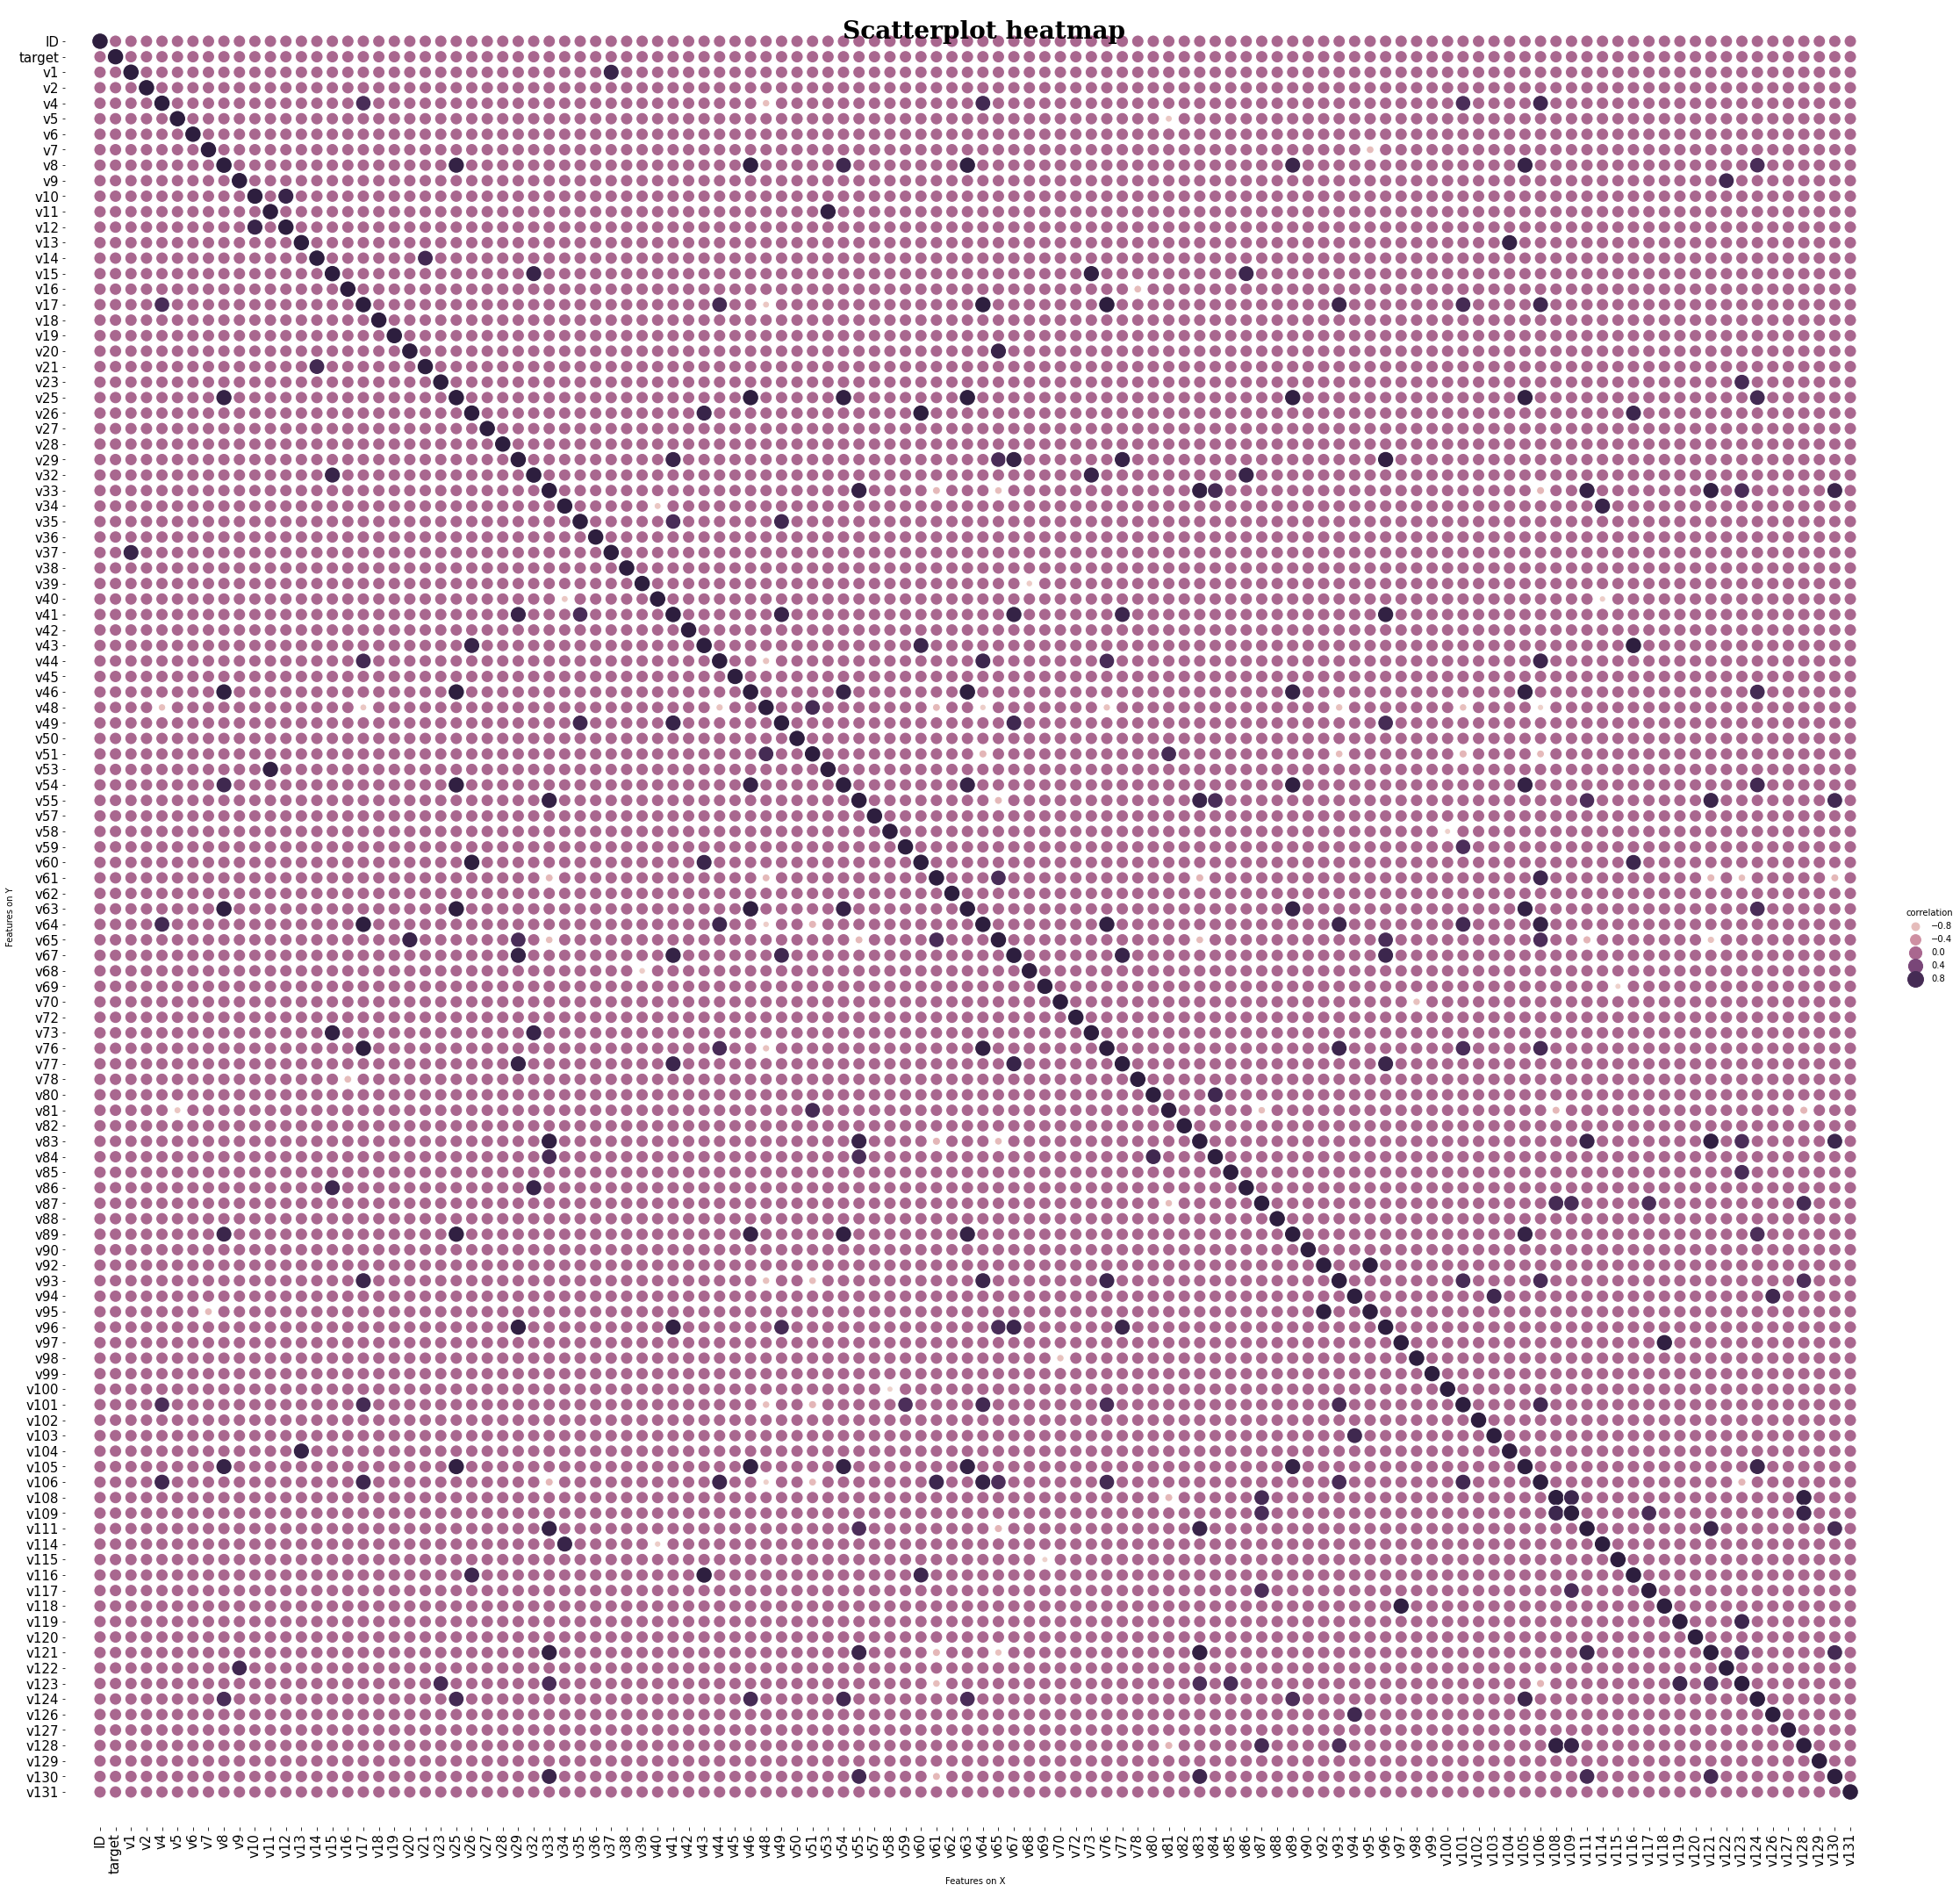

In [19]:
fig = plt.figure(figsize=(100, 100))

corr_mat = df.corr().stack().reset_index(name="correlation")

# Setting correlation value=0, for less correlated features to better visualise highly correlated feature.
mask = [(corr_mat['correlation'] < .75) & (corr_mat['correlation'] >-.75)]
corr_mat['correlation'].iloc[mask] = 0

grid = sns.relplot(data=corr_mat, x='level_0', y='level_1', hue='correlation', hue_norm=(-1, 1),
           height=30, sizes=(50, 350), size_norm=(-1, 1), size='correlation')

grid.set(xlabel="Features on X", ylabel="Features on Y", aspect="equal")
grid.despine(left=True, bottom=True)
grid.fig.suptitle('Scatterplot heatmap',fontsize=28, fontweight='bold', fontfamily='serif')
grid.ax.margins(.02)

for label in grid.ax.get_xticklabels():
    label.set_rotation(90)
    label.set_fontsize(15)
for label in grid.ax.get_yticklabels():
    label.set_fontsize(15)

plt.show()

### 3.2.3 Distribution of categorical features against target

In [20]:
def set_spines_visibility(ax, is_visible):
    for s in ['left', 'right', 'top', 'bottom']:
        ax.spines[s].set_visible(False)

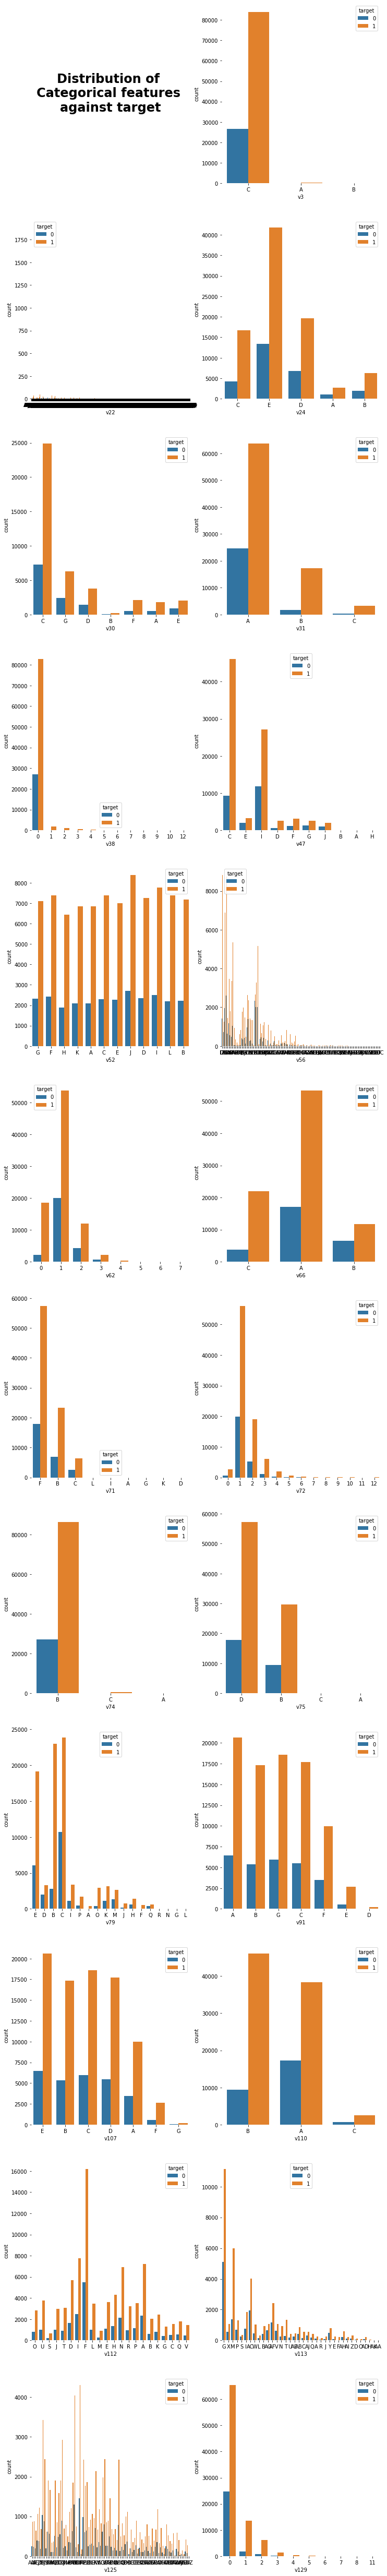

In [21]:
fig = plt.figure(figsize=(12, 90))
gs = fig.add_gridspec(12, 2)

for i in range(len(cat_cols)+1):
    ax = fig.add_subplot(gs[i//2, i%2])
    if i == 0:
        ax.text(x=.5, y=.5, s="Distribution of \nCategorical features \nagainst target",
               horizontalalignment='center', verticalalignment='center',
               fontsize='24', fontweight='bold')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.tick_params(left=False, bottom=False)
    else:
        sns.countplot(ax=ax, data=df, x=cat_cols[i-1], fill=True, hue=target_col[0])
    set_spines_visibility(ax, False)

#### 3.2.4 Boxen plot of continuous variables vs target

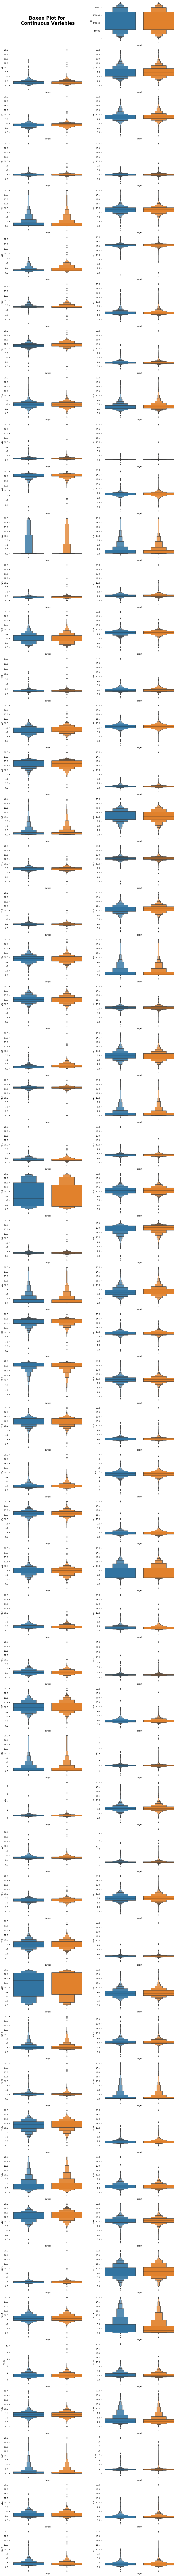

In [22]:
fig = plt.figure(figsize=(16, 250))
gs = fig.add_gridspec(55, 2)

for i in range(len(con_cols) + 1):
    if i == 0:
        ax = fig.add_subplot(gs[0,0])
        ax.text(x=0.5, y=0.5, s="Boxen Plot for \nContinuous Variables",
               horizontalalignment='center', verticalalignment='center',
               fontweight='bold', fontsize='24')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
        set_spines_visibility(ax, False)
    else:
        ax = fig.add_subplot(gs[(i)//2, i%2])
        sns.boxenplot(ax=ax, data=df, y=con_cols[i-1], x=target_col[0])
        set_spines_visibility(ax, False)
plt.show()

## 4 Conclusions from EDA <a id=12></a>
1. There are both categorical and continuous features present in data and target feature has binary value.
2. Feature values are mixed of int, float64 & object data types.
3. There are multiple columns with a high degree of missing values.
4. There is a class imbalance in target variable ('label 0':23.1%, 'label 1':76.9%).
5. Based on univariate count plots of categorical variables, features <b> v3, v30, v31, v38, v62, v74 & v129 </b> seemed single valued feature i.e. zero-vector predictor. These columns have same value in more than <b>95%</b> of the samples and not adding useful information for model building.
6. <b>Outliers</b> are present in a `majority of continuous feature variables` that we need to address during data pre-processing.
7. There are continuous variables with skewed distributions.
8. PCA shows that we can keep <b>99% data variance</b> with 5 columns only. Hence, there are dependent variables in data.
9. There are highly correlated dependent features to other dependent features based on the [3.2.1] heatmap and [3.2.2] scatter plot heatmap.

### If you like the notebook, consider giving an upvote.
Check my other notebooks 

1. https://www.kaggle.com/code/crashoverdrive/data-science-salary-complete-eda
2. https://www.kaggle.com/code/crashoverdrive/studentsperformance-data-visualization-beginners
3. https://www.kaggle.com/code/crashoverdrive/heart-attack-analysis-prediction-90-accuracy
4. https://www.kaggle.com/code/crashoverdrive/song-popularity-prediction-visualizations